In [1]:
!mkdir iris_analysis
!cd iris_analysis
!python3 -m venv env
!source env/bin/activate  # On Windows use `env\Scripts\activate`
!pip install pandas matplotlib seaborn

The virtual environment was not created successfully because ensurepip is not
available.  On Debian/Ubuntu systems, you need to install the python3-venv
package using the following command.

    apt install python3.10-venv

You may need to use sudo with that command.  After installing the python3-venv
package, recreate your virtual environment.

Failing command: /content/env/bin/python3

/bin/bash: line 1: env/bin/activate: No such file or directory


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
iris = pd.read_csv(url)

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


Data Inspection:

In [6]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris.shape

(150, 5)

In [9]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


In [11]:
iris.nunique()

,0
sepal_length,35
sepal_width,23
petal_length,43
petal_width,22
species,3


Missing Values:

In [12]:
iris.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


There is no null values in iris dataset.

Outliers Detection:

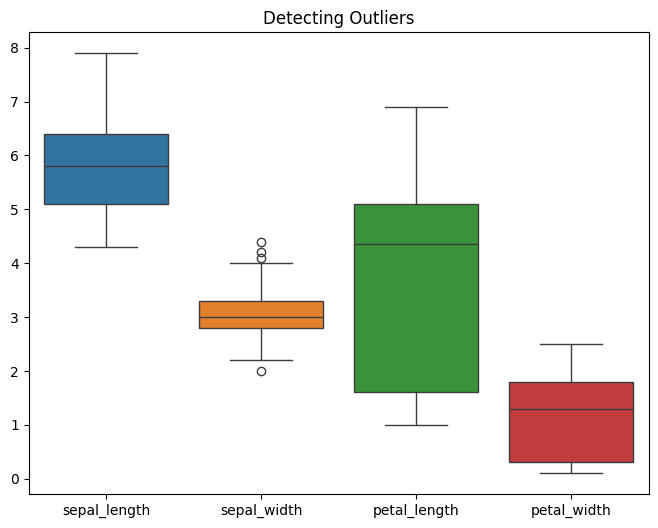

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=iris)
plt.title("Detecting Outliers")
plt.show()

Duplicate vlaues:

In [14]:
iris.duplicated().sum()

1

In [15]:
iris.drop_duplicates(inplace=True)

In [16]:
iris.duplicated().sum()

0

Exploratory Data Analysis:

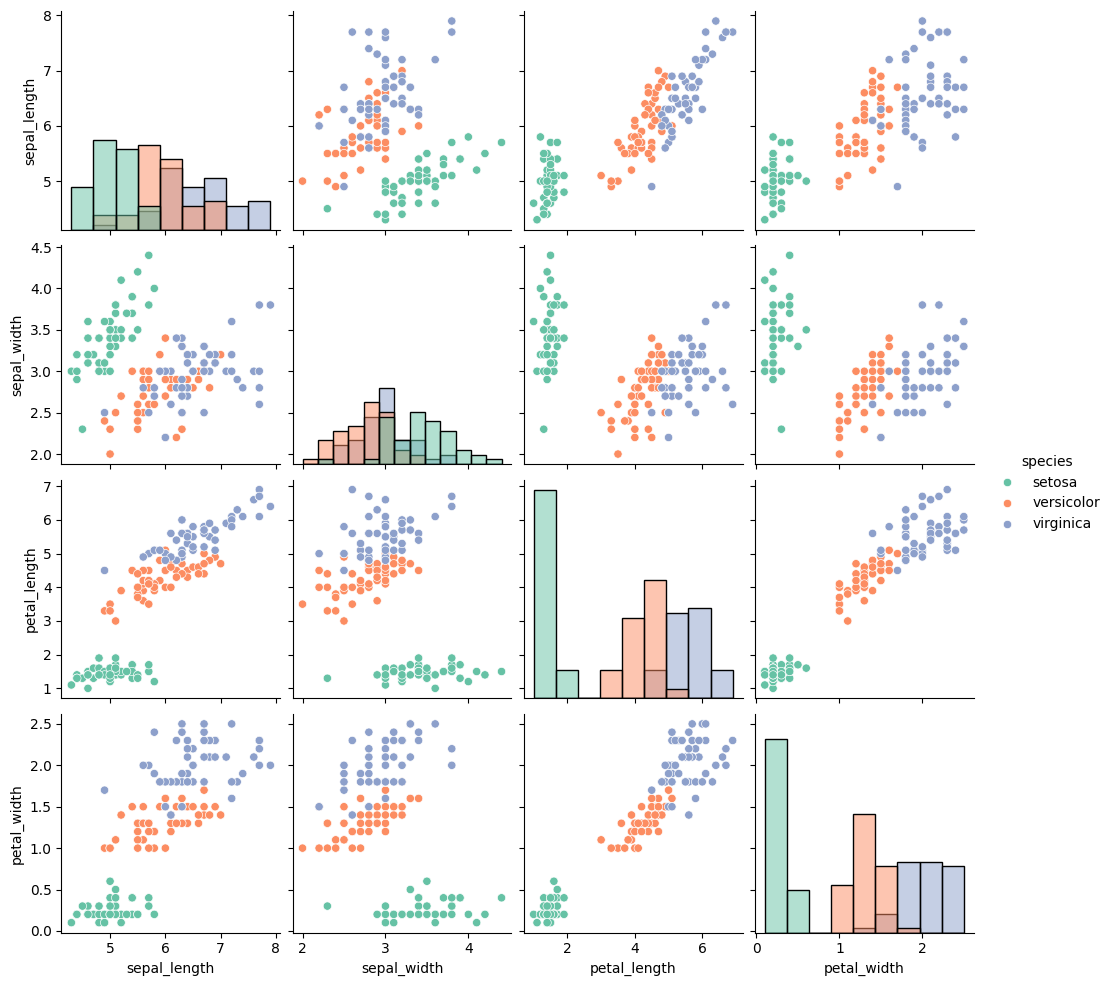

In [17]:
sns.pairplot(iris,hue='species', palette='Set2', diag_kind='hist')
plt.show()

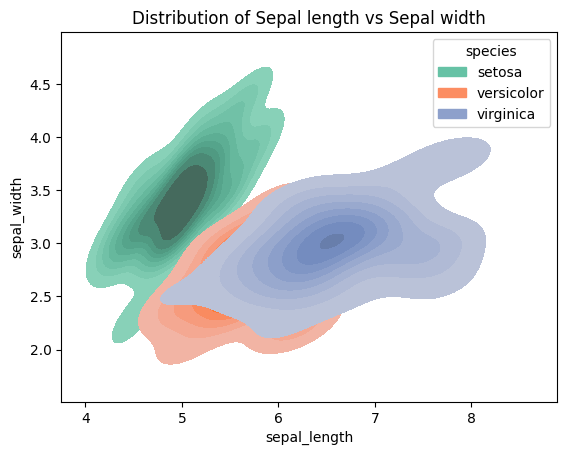

In [18]:
sns.kdeplot(data=iris, x='sepal_length', y='sepal_width', hue='species', fill=True, palette='Set2')
plt.title('Distribution of Sepal length vs Sepal width')
plt.show()

Observation:

Species Clustering:
*   this plot reveals the distinct clusters for each Iris species based on sepal length and sepal width.
*   Setosa is clearly separated from the other two species with shorter sepal length and wider sepal width.
* Versicolor and Virginica have some overlap but still exhibit distinguishable distributions.

Sepal lenth and Width Relationship:
* Within each species cluster, there's a positive correlation between sepal length and width. This means that flowers with longer sepals tend to have wider sepals as well.

Distribution Shape:

*   Setosa's distribution is relatiively compact and unimodal(single peak).
*   Versicolor and Virginica have more elongated and slightly overlaping distributions.

Density:

*   The density of data points is highest in the central regions of each species cluster, indicating the most common sepal length and width combinations for each species.

Interpretation

* These observations suggest that:
Sepal length and width are important features for distinguishing between Iris species, particularly for separating Setosa from the other two.
* There's natural variation in sepal dimensions within each species, but the overall distributions are distinct.
* The positive correlation between sepal length and width indicates a potential growth pattern or structural relationship in the sepals.







Model Building:

In [19]:
X = iris.drop(['species'], axis=1)
y = iris['species']

Splitting of the dataset:

In [20]:
!pip install scikit-learn
# Import necessary libraries
from sklearn.model_selection import train_test_split

X = iris.drop(['species'], axis=1)
y = iris['species']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression:

In [21]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [22]:
clf = lg.fit(X_train, y_train)

In [23]:
y_pred = clf.predict(X_test)

In [24]:
print('Accuracy:', clf.score(X_test, y_test))

Accuracy: 1.0


Accuracy score 1 implies that the model has perfect accuracy as in it is a completely perfect model.

In [25]:
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 1.0


Here we can witness that the accuracy score is 1 which represents 100% accuracy.

Classification Report:

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Observation:


*   **Perfect Score:** The model has achieved perfect precision, recall and F1-score which is 1 for all the three species. This indicated that the model correctly classified all instances in the test set.
*   **High Accuracy:** The overall accuracy of the model is also 1.00(or 100%) further confirming its flawless performance on the test data.

*   **Balanced Performance:** The macro average and the weighted average are also 1.00 indicating that the model performed equally well across all classes, regardless of their size.






Correlation Matrix:

In [27]:
iris.drop(columns=['species']).corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.118129,0.873738,0.820620
sepal_width,-0.118129,1.000000,-0.426028,-0.362894
petal_length,0.873738,-0.426028,1.000000,0.962772
petal_width,0.820620,-0.362894,0.962772,1.000000


Observation:

*   There's a very strong positive correlation between:
petal length and petal width(0.96)
sepal length and petal length(0.87)
sepal length and petal width(0.81)
This means that if one of the feature increases, the other tends to increase as well.
*   There's a moderate positive correlation between sepal width and petal length (0.42).

*   There's a very weak positive correlation between sepal width and petal width (0.36), and a negative correlation between sepal length and sepal width (-0.12).
*   Petal length and petal width are highly related, which makes sense intuitively as larger petals would typically be both longer and wider.

*   Sepal length is also strongly related to petal size (length and width), indicating a potential relationship between overall flower size and petal dimensions.
*   Sepal width has a weaker relationship with the other features, suggesting it might be less important in distinguishing between Iris species.

*   The negative correlation between sepal length and sepal width suggests that flowers with longer sepals tend to have narrower sepals, and vice versa.









<Axes: >

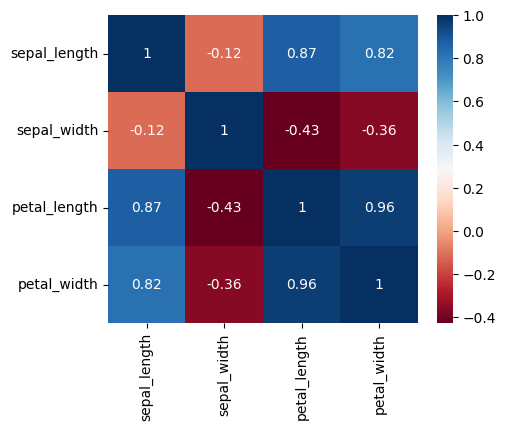

In [28]:
fig, ax=plt.subplots(figsize=(5,4))
corr = iris.drop(columns=['species']).corr() # Calculate correlation excluding 'species' column
sns.heatmap(corr,annot=True,ax=ax,cmap='RdBu')

KNN (K-Nearest model):

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print('Accuracy:', accuracy_score(y_test, knn.predict(X_test)))

Accuracy: 1.0


The accuracy score for KNN model is 1.0 (or 100%) showcasing it as a perfect model.

Decision Tree Model:

In [30]:
from sklearn.tree  import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print('Accuracy:', accuracy_score(y_test, dt.predict(X_test)))

Accuracy: 1.0


The accuracy score for the Decision Tree Classifier model is 1.0 (or 100%) it is a perfect model.

Confusion Matrix:

In [31]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [34]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# To get predictions, use your trained classifier 'clf' or 'dt'
y_pred1 = clf.predict(X_test)  # Or dt.predict(X_test) if using Decision Tree
y_pred2 = clf.predict(X_test)  # Or dt.predict(X_test) if using Decision Tree
y_pred3 = clf.predict(X_test)  # Or dt.predict(X_test) if using Decision Tree

In [35]:
conf_matrix1 = confusion_matrix(y_test, y_pred1)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
conf_matrix3 = confusion_matrix(y_test, y_pred3)

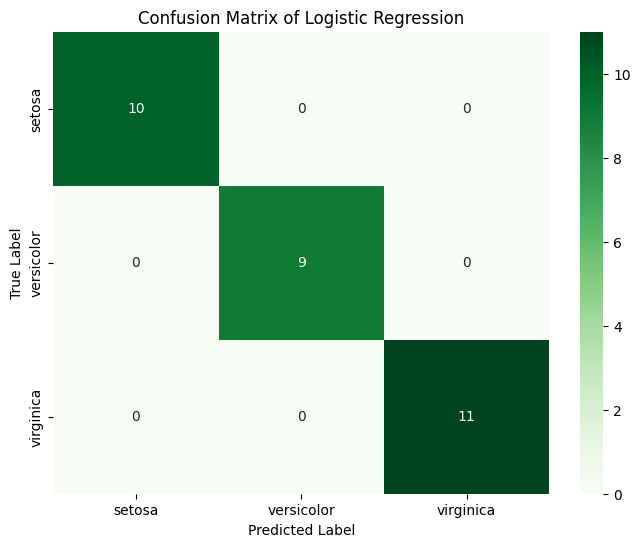

In [37]:
import numpy as np
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y), yticklabels=np.unique(y)) # Use np.unique after importing numpy
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

Observation:


*   Perfect Classification: The confusion matrix shows that all the predictions made by the logistic Regression model were correct. This is evident from the diagonal elements of the matrix having values greater than 0, while all other elements are 0. This means that the model achieved 100% accuracy on the test set for all three classes of Iris.
*   No Misclassifications: There are no off-diagonal elements in the matrix with non-zero values, signifying that there were no instances where the model misclassified a data point. This indicates a flawless performance on the test data.


*   High Accuracy and Balanced performance: The fact that there were no misclassifications further supports the previously observed high accuracy score(1.0) and balanced performance across all classes reported in the classification report.



